In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [3]:
txt = ["He is ::having a great Time, at the park time?",
       "She, unlike most women, is a big player on the park's grass.",
       "she can't be going"]

In [4]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['big', 'going', 'grass', 'great', 'having', 'park', 'player', 'time', 'unlike', 'women']

Every 3rd feature:
['big', 'great', 'player', 'women']


In [5]:
print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 10
Vocabulary content:
 {'having': 4, 'great': 3, 'time': 7, 'park': 5, 'unlike': 8, 'women': 9, 'big': 0, 'player': 6, 'grass': 2, 'going': 1}


In [7]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'going', 'grass', 'great', 'great time', 'having', 'having great', 'park', 'park grass', 'park time', 'player', 'player park', 'time', 'time park', 'unlike', 'unlike women', 'women', 'women big']


In [8]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'big player park', 'going', 'grass', 'great', 'great time', 'great time park', 'having', 'having great', 'having great time', 'park', 'park grass', 'park time', 'player', 'player park', 'player park grass', 'time', 'time park', 'time park time', 'unlike', 'unlike women', 'unlike women big', 'women', 'women big', 'women big player']


In [9]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=0.6, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, \
meaning 0.66% of the time.\
      \nThe rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear")

['park']

Only 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, meaning 0.66% of the time.      
The rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear


In [10]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.50, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.")

['big', 'going', 'grass', 'great', 'having', 'player', 'time', 'unlike', 'women']

Only 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.


In [11]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=4)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'going', 'park', 'time']


### TfidfVectorizer -- Brief Tutorial

The goal of using tf-idf is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. (https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/feature_extraction/text.py#L1365)

In [12]:
txt1 = ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print ("The text: ", txt1)

The text:  ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']


In [13]:
tf.vocabulary_

{'his': 0, 'not': 1, 'perfect': 2, 'sang': 3, 'she': 4, 'smile': 5, 'was': 6}

In [14]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))
print("\nWe see that the tokens 'sang','she' have the most idf weight because \
they are the only tokens that appear in one document only.")
print("\nThe token 'not' appears 6 times but it is also in all documents, so its idf is the lowest")

{'his': 1.4054651081081644, 'not': 1.0, 'perfect': 1.4054651081081644, 'sang': 2.09861228866811, 'she': 2.09861228866811, 'smile': 1.4054651081081644, 'was': 1.4054651081081644}

We see that the tokens 'sang','she' have the most idf weight because they are the only tokens that appear in one document only.

The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest


In [15]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

In [16]:
rr

{'his': 1.4054651081081644,
 'not': 1.0,
 'perfect': 1.4054651081081644,
 'sang': 2.09861228866811,
 'she': 2.09861228866811,
 'smile': 1.4054651081081644,
 'was': 1.4054651081081644}

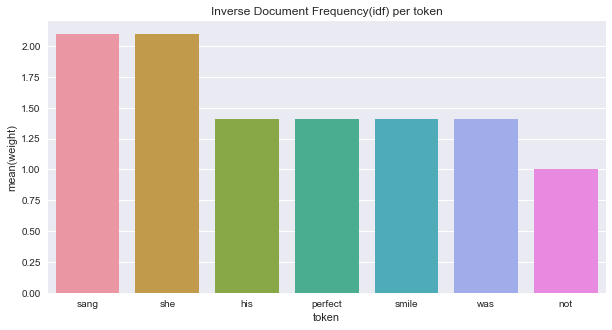

In [17]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [18]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['not' 'his' 'perfect']

Features with highest idf:
['was' 'sang' 'she']


In [19]:
print("The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1\
 its weight is 0 because it does not appear there.")
txt_transformed.toarray()

The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1 its weight is 0 because it does not appear there.


array([[ 1.40546511,  1.        ,  1.40546511,  0.        ,  0.        ,
         1.40546511,  1.40546511],
       [ 1.40546511,  4.        ,  1.40546511,  0.        ,  0.        ,
         1.40546511,  1.40546511],
       [ 0.        ,  1.        ,  0.        ,  2.09861229,  2.09861229,
         0.        ,  0.        ]])

TF-IDF - Maximum token value throughout the whole dataset

In [20]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv').fillna(' ')

In [21]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [25]:
train.shape

(159571, 8)

In [22]:
start_time=time.time()
# remove '\\n'
train['comment_text'] = train['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))

end_time=time.time()
print("total time",end_time-start_time)

total time 6.052999973297119


In [23]:
# remove '\\n'
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))

In [24]:
x = train['comment_text']
y = train.iloc[:, 2:8]  

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(127656,)
(127656, 6)
(31915,)
(31915, 6)


In [29]:
start_time=time.time()

# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1),
    max_features=30000)

# fit and transform on it the training features
word_vectorizer.fit(X_train)
X_train_word_features = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
test_features = word_vectorizer.transform(X_test)

# transform the holdout text for submission at the end
holdout_text = holdout['comment_text']
holdout_word_features = word_vectorizer.transform(holdout_text)

end_time=time.time()
print("total time",end_time-start_time)

total time 37.07191276550293


In [30]:
class_names = ['toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate']

losses = []
auc = []

for class_name in class_names:
    #call the labels one column at a time so we can run the classifier on them
    train_target = y_train[class_name]
    test_target = y_test[class_name]
    classifier = LogisticRegression(solver='sag', C=10)

    cv_loss = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='neg_log_loss'))
    losses.append(cv_loss)
    print('CV Log_loss score for class {} is {}'.format(class_name, cv_loss))

    cv_score = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='accuracy'))
    print('CV Accuracy score for class {} is {}'.format(class_name, cv_score))
    
    classifier.fit(X_train_word_features, train_target)
    y_pred = classifier.predict(test_features)
    y_pred_prob = classifier.predict_proba(test_features)[:, 1]
    auc_score = metrics.roc_auc_score(test_target, y_pred_prob)
    auc.append(auc_score)
    print("CV ROC_AUC score {}\n".format(auc_score))
    
    print(confusion_matrix(test_target, y_pred))
    print(classification_report(test_target, y_pred))

print('Total average CV Log_loss score is {}'.format(np.mean(losses)))
print('Total average CV ROC_AUC score is {}'.format(np.mean(auc)))

CV Log_loss score for class toxic is -0.11565060036541504
CV Accuracy score for class toxic is 0.9589835178269303
CV ROC_AUC score 0.9655633052947897

[[28571   356]
 [  965  2023]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98     28927
          1       0.85      0.68      0.75      2988

avg / total       0.96      0.96      0.96     31915

CV Log_loss score for class severe_toxic is -0.02870223173759266
CV Accuracy score for class severe_toxic is 0.9901923827175312
CV ROC_AUC score 0.9819670455594212

[[31533    79]
 [  213    90]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     31612
          1       0.53      0.30      0.38       303

avg / total       0.99      0.99      0.99     31915

CV Log_loss score for class obscene is -0.06353778626883393
CV Accuracy score for class obscene is 0.9784577368944316
CV ROC_AUC score 0.9825812057362143

[[30131   160]
 [  470  1154]]
      

### Vectorize, Classify (with parameter tuning)

In [31]:
x = train['comment_text']
y = train.iloc[:, 2:8]  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [32]:
start_time=time.time()

pipe = make_pipeline(TfidfVectorizer(
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{1,}', #accept tokens that have 1 or more characters
                                    analyzer='word',
                                    ngram_range=(1, 1),
                                    min_df=5),
                     OneVsRestClassifier(LogisticRegression()))
param_grid = {'tfidfvectorizer__max_features': [10000, 30000],
              'onevsrestclassifier__estimator__solver': ['liblinear', 'sag'],
             } 
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')

grid3 = grid.fit(X_train, y_train)

end_time=time.time()
print("total time",end_time-start_time)

total time 329.3189539909363


In [33]:
print(grid3.best_estimator_.named_steps['onevsrestclassifier'])
print(grid3.best_estimator_.named_steps['tfidfvectorizer'])

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)


In [34]:
grid3.best_params_

{'onevsrestclassifier__estimator__solver': 'sag',
 'tfidfvectorizer__max_features': 30000}

In [35]:
grid3.best_score_

0.97782430112632579

In [36]:
predicted_y_test = grid3.predict(X_test)

In [38]:
print("Toxic Confusion Matrixs: \n{}".format(confusion_matrix(y_test['toxic'], predicted_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(confusion_matrix(y_test['severe_toxic'], predicted_y_test[:,1])))
print("\nObscene: \n{}".format(confusion_matrix(y_test['obscene'], predicted_y_test[:,2])))
print("\nThreat: \n{}".format(confusion_matrix(y_test['threat'], predicted_y_test[:,3])))
print("\nInsult: \n{}".format(confusion_matrix(y_test['insult'], predicted_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(confusion_matrix(y_test['identity_hate'], predicted_y_test[:,5])))

print("\nToxic Classification report: \n{}".format(classification_report(y_test['toxic'], predicted_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(classification_report(y_test['severe_toxic'], predicted_y_test[:,1])))
print("\nObscene: \n{}".format(classification_report(y_test['obscene'], predicted_y_test[:,2])))
print("\nThreat: \n{}".format(classification_report(y_test['threat'], predicted_y_test[:,3])))
print("\nInsult: \n{}".format(classification_report(y_test['insult'], predicted_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(classification_report(y_test['identity_hate'], predicted_y_test[:,5])))
#Toxic Confusion Matrixs: 

Toxic Confusion Matrixs: 
[[28766   161]
 [ 1235  1753]]

Severe Toxic: 
[[31558    54]
 [  234    69]]

Obscene: 
[[30209    82]
 [  598  1026]]

Threat: 
[[31815    10]
 [   76    14]]

Insult: 
[[30235   177]
 [  755   748]]

Identity Hate: 
[[31617    21]
 [  233    44]]

Toxic Classification report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.98     28927
          1       0.92      0.59      0.72      2988

avg / total       0.95      0.96      0.95     31915


Severe Toxic: 
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     31612
          1       0.56      0.23      0.32       303

avg / total       0.99      0.99      0.99     31915


Obscene: 
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     30291
          1       0.93      0.63      0.75      1624

avg / total       0.98      0.98      0.98     31915


Threat: 
           

In [39]:
vectorizer = grid3.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_test_set = vectorizer.transform(X_test)


# find maximum value for each of the features over dataset:
max_value = X_test_set.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['overstating' 'tusc' 'leona' 'ashish' 'tvs' 'divorcing' 'chandler' 'spoon'
 'ashoka' 'ashraf' 'chandigarh' 'sporadically' 'jurors' 'queues' 'diwan'
 'grabs' 'sportsman' 'oppressing' 'warms' 'aslo']

Features with highest tfidf: 
['russian' 'source' 'yes' 's' 'paranoia' 'called' 'template' 'natural'
 'fish' 'soon' 'understand' 'fine' 'canon' 'nazi' 'inserted' 'solved'
 'information' 'career' 'filter' 'pwned']


In [40]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['s' 't' 'article' 'page' 'talk' 'wikipedia' 'just' 'like' 'don' 'think'
 'know' 'm' 'edit' 'people' 'time' 'did' 'thanks' 'articles' 'make' 'use'
 'good' 'does' 've' 'want' 'way' 'need' 'thank' 'information' 'editing'
 'user' 'say' 'new' 'really' 'pages' 'sources' 'help' 'edits' 'look'
 'section' 'add' 'source' 'wp' 'used' 'right' 'work' 'point' 'discussion'
 'read' 'll' 'deleted' 'fact' 'utc' 'going' 'blocked' 'stop' 'said' 'd'
 'added' 'sure' 'removed' 'link' 'let' 'better' 'doesn' 'reason' 'feel'
 'list' 'place' 'actually' 'note' 'content' 'case' 'using' 'history' 'hi'
 'believe' 'deletion' 'editors' 'free' '2' 'comment' 'things' 'person'
 'question' 'personal' 'thing' '1' 'didn' 'ask' 'comments' 'vandalism'
 'best' 'remove' 'hope' 'wrong' 'problem' 'little' 'trying' 'change' 'wiki']


In [41]:
holdout_comments = holdout['comment_text']
# holdoutComments are automatically transformed throguh the grid3 pipeline before prodicting probabilities
twod = grid3.predict_proba(holdout_comments)

In [42]:
holdout_predictions = {}
holdout_predictions = {'id': holdout['id']}  

holdout_predictions['toxic']=twod[:,0]
holdout_predictions['severe_toxic']=twod[:,1]
holdout_predictions['obscene']=twod[:,2]
holdout_predictions['threat']=twod[:,3]
holdout_predictions['insult']=twod[:,4]
holdout_predictions['identity_hate']=twod[:,5]
    
submission = pd.DataFrame.from_dict(holdout_predictions)
submission = submission[['id','toxic','severe_toxic','obscene','threat','insult','identity_hate']] #rearrange columns
submission.to_csv('submission.csv', index=False)

### Bonus: Adding features to pipeline

In [43]:
# calculate lenght of characters in each comment
train['len_character'] = train['comment_text'].apply(lambda x: len(re.findall(r"[\w]", str(x))))

In [44]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion #unites all arrays into one array
from sklearn.pipeline import Pipeline

In [45]:
x = train[['comment_text','len_character']] #these will be our features
y = train.iloc[:, 2:8]  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [46]:
# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda a: a[['len_character']], validate=False)
get_text_data = FunctionTransformer(lambda a: a['comment_text'], validate=False)

print(get_text_data.fit_transform(X_train).shape)
print(get_numeric_data.fit_transform(X_train).shape)

(127656,)
(127656, 1)


In [47]:
pl = Pipeline([
        ('union', FeatureUnion(                      #unites both text and numeric arrays into one array
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data)
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', TfidfVectorizer(
                                                    stop_words='english',
                                                    strip_accents='unicode',
                                                    token_pattern=r'\w{2,}',
                                                    analyzer='word',
                                                    ngram_range=(1, 1),
                                                    min_df=5))
                ]))
             ]
        )), #right here is where we would put interaction terms preprocessing such as PolynomialFeatures
            #(right here is where we would put a scaler if we needed one)
        ('clf', OneVsRestClassifier(LogisticRegression())) 
    ])

In [48]:
param_grid = {'union__text_features__vectorizer__max_features': [10000, 30000],
              'clf__estimator__C': [0.1, 1]
             } 
grid = GridSearchCV(pl, param_grid, cv=3, scoring='roc_auc')

grid4 = grid.fit(X_train, y_train)

In [49]:
print(grid4.best_score_)
print(grid4.best_params_)
print(grid4.estimator)

0.976986853037
{'clf__estimator__C': 1, 'union__text_features__vectorizer__max_features': 30000}
Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000001B9225000D0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])


In [50]:
pred_y_test = grid4.predict(X_test)

print("Toxic Confusion Matrixs: \n{}".format(confusion_matrix(y_test['toxic'], pred_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(confusion_matrix(y_test['severe_toxic'], pred_y_test[:,1])))
print("\nObscene: \n{}".format(confusion_matrix(y_test['obscene'], pred_y_test[:,2])))
print("\nThreat: \n{}".format(confusion_matrix(y_test['threat'], pred_y_test[:,3])))
print("\nInsult: \n{}".format(confusion_matrix(y_test['insult'], pred_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(confusion_matrix(y_test['identity_hate'], pred_y_test[:,5])))

print("\nToxic Classification report: \n{}".format(classification_report(y_test['toxic'], pred_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(classification_report(y_test['severe_toxic'], pred_y_test[:,1])))
print("\nObscene: \n{}".format(classification_report(y_test['obscene'], pred_y_test[:,2])))
print("\nThreat: \n{}".format(classification_report(y_test['threat'], pred_y_test[:,3])))
print("\nInsult: \n{}".format(classification_report(y_test['insult'], pred_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(classification_report(y_test['identity_hate'], pred_y_test[:,5])))

Toxic Confusion Matrixs: 
[[28760   167]
 [ 1244  1744]]

Severe Toxic: 
[[31556    56]
 [  229    74]]

Obscene: 
[[30228    63]
 [  717   907]]

Threat: 
[[31814    11]
 [   75    15]]

Insult: 
[[30240   172]
 [  768   735]]

Identity Hate: 
[[31616    22]
 [  230    47]]

Toxic Classification report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.98     28927
          1       0.91      0.58      0.71      2988

avg / total       0.95      0.96      0.95     31915


Severe Toxic: 
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     31612
          1       0.57      0.24      0.34       303

avg / total       0.99      0.99      0.99     31915


Obscene: 
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     30291
          1       0.94      0.56      0.70      1624

avg / total       0.97      0.98      0.97     31915


Threat: 
           